In [3]:
import os
import pandas as pd
import face_recognition
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Definir la ruta de la carpeta que contiene las imágenes
ruta_carpeta = '/home/waldos/Documents/2doCodigo/TopicoIA/BD/corpus_images'



Recorremos toda la carpeta y hacemos una matriz con todos los datos de todas las imagenes

In [4]:
# Crear una lista para almacenar los datos de las imágenes
datos_imagen_recortada = {}
directorio = {'Imagen': [], 'Caracteristicas': [], 'Rostro': [], 'Etiqueta': []}
# Recorrer la carpeta para buscar archivos jpg
for carpeta_nombre in os.listdir(ruta_carpeta):
    carpeta_ruta = os.path.join(ruta_carpeta, carpeta_nombre)
    if os.path.isdir(carpeta_ruta):
        for archivo_nombre in os.listdir(carpeta_ruta):
            try:
                archivo_ruta = os.path.join(carpeta_ruta, archivo_nombre)
                imagen = cv2.imread(archivo_ruta)
                # Leer la imagen en escala de grises
                imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

                # Cambiar el tamaño de la imagen
                imagen_redimensionada = cv2.resize(imagen_gris, (150, 150))

                # Cambiar la forma de la imagen para añadir una dimensión de canal
                imagen_gris = cv2.cvtColor(imagen_gris, cv2.COLOR_GRAY2BGR)

                # Ahora la forma de la imagen sería (1, altura, ancho, 3)

                # Obtener los landmarks faciales
                caracteristicas_faciales = face_recognition.face_landmarks(imagen_redimensionada)
                
                # Detectar los rostros en la imagen
                puntosX_YRostro = face_recognition.face_locations(imagen_redimensionada)

                #Recorta la cara
                puntos_ubicacion_cara = puntosX_YRostro[0]
                arriba, derecha, abajo, izquierda = puntos_ubicacion_cara
                cara_recortada = imagen_redimensionada[arriba:abajo, izquierda:derecha]
                
                # Agregar la información de la imagen al DataFrame
                #datos_imagen_recortada.append([imagen_redimensionada, caracteristicas,cara_recortada,carpeta_nombre])
                directorio['Imagen'].append(imagen_redimensionada)
                directorio['Caracteristicas'].append(caracteristicas_faciales)
                directorio['Rostro'].append(cara_recortada)
                directorio['Etiqueta'].append(carpeta_nombre)
                
            except Exception as e:
                print("Error en archivo:"+str(archivo_nombre)+":"+str(e))
print("Proceso terminado")

Error en archivo:identificador_5772_2016-12-05_14-31-53.jpeg:list index out of range


KeyboardInterrupt: 

Transformamos los datos a un pandas

In [3]:
columnas = ['Imagen', 'Caracteristicas', 'Rostro', 'Etiqueta']
df = pd.DataFrame(directorio, columns=columnas)


In [4]:
df.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[181, 181, 181, 181, 182, 182, 181, 182, 182,...","[{'chin': [(60, 68), (60, 74), (61, 80), (62, ...","[[27, 25, 33, 28, 19, 23, 33, 22, 23, 42, 79, ...",focused
1,"[[165, 165, 166, 165, 167, 166, 166, 166, 166,...","[{'chin': [(55, 59), (55, 65), (56, 72), (57, ...","[[165, 16, 8, 46, 13, 11, 8, 13, 32, 73, 93, 1...",focused
2,"[[162, 163, 162, 162, 163, 162, 162, 162, 162,...","[{'chin': [(56, 74), (56, 81), (58, 89), (59, ...","[[17, 18, 15, 23, 38, 67, 87, 96, 95, 102, 102...",focused
3,"[[167, 167, 167, 167, 169, 167, 167, 168, 168,...","[{'chin': [(59, 83), (59, 90), (59, 97), (60, ...","[[173, 149, 16, 13, 13, 12, 31, 68, 91, 96, 10...",focused
4,"[[171, 169, 170, 168, 171, 172, 170, 170, 171,...","[{'chin': [(50, 67), (50, 74), (51, 81), (52, ...","[[171, 171, 170, 168, 52, 16, 8, 5, 8, 27, 72,...",focused


Transformamos la parte de caracteristicas de directorio a numpy array

In [5]:
def extraer_caracteristicas_faciales(caractetisticas_faciales_lista):
    """
    Toma los diccionarios almacenados en la columna Hitos faciales y elimina las keys,
    dejando solo las coordenadas de donde se encuentran los puntos faciales.
    """
    caracteristicas_array = []
    for caracteristicas in caractetisticas_faciales_lista:
        puntos_referencia = []
        for rasgo_facial in caracteristicas.keys():
            puntos_referencia.extend(caracteristicas[rasgo_facial])
        caracteristicas_array.append(puntos_referencia)
    return np.array(caracteristicas_array)

# Sobrescribir la columna 'Hitos faciales' con las coordenadas de hitos faciales
df['Caracteristicas'] = df['Caracteristicas'].apply(extraer_caracteristicas_faciales)

In [6]:
df.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[181, 181, 181, 181, 182, 182, 181, 182, 182,...","[[[60, 68], [60, 74], [61, 80], [62, 86], [65,...","[[27, 25, 33, 28, 19, 23, 33, 22, 23, 42, 79, ...",focused
1,"[[165, 165, 166, 165, 167, 166, 166, 166, 166,...","[[[55, 59], [55, 65], [56, 72], [57, 78], [59,...","[[165, 16, 8, 46, 13, 11, 8, 13, 32, 73, 93, 1...",focused
2,"[[162, 163, 162, 162, 163, 162, 162, 162, 162,...","[[[56, 74], [56, 81], [58, 89], [59, 96], [62,...","[[17, 18, 15, 23, 38, 67, 87, 96, 95, 102, 102...",focused
3,"[[167, 167, 167, 167, 169, 167, 167, 168, 168,...","[[[59, 83], [59, 90], [59, 97], [60, 104], [61...","[[173, 149, 16, 13, 13, 12, 31, 68, 91, 96, 10...",focused
4,"[[171, 169, 170, 168, 171, 172, 170, 170, 171,...","[[[50, 67], [50, 74], [51, 81], [52, 88], [53,...","[[171, 171, 170, 168, 52, 16, 8, 5, 8, 27, 72,...",focused


In [7]:
print(df['Imagen'][0].shape)
print(df['Caracteristicas'][0].shape)
print(df['Rostro'][0].shape)

(150, 150)
(1, 72, 2)
(52, 51)


Conversion a JSON. Es muy pesado, por lo que pasamos de ello.

In [8]:
#df_imagenes_recortadas.to_json('test.csv')

In [9]:
#df_jason = pd.read_json('test.csv')
#df_jason.head()

Pickle es una buena opción. Este se usa para serializar objetos en Python. Lamentablemente su uso está únicamente destinado a Python

In [10]:
#df_imagenes_recortadas.to_pickle('test.pkl')

In [11]:
#df_pickle = pd.read_pickle('test.pkl')
#df_pickle.head()

HDF5 es una gran opción. Se usa para el manejo de datos y pueden utilizarlo otros lenguajes o programas como MATLAB y Java. Está destinado para manejo de grandes datos.

Instalar tables para usar hdf5

In [12]:
#pip install tables

In [13]:
df.to_hdf('BD_Emotions_Gray_Final_V2.h5', key='dataframe', mode='w')

/tmp/ipykernel_5623/2852785094.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Imagen', 'Caracteristicas', 'Rostro', 'Etiqueta'], dtype='object')]

  df.to_hdf('BD_Emotions_Gray_Final_V2.h5', key='dataframe', mode='w')


Leer el archivo creado

In [14]:
df_HDF = pd.read_hdf('BD_Emotions_Gray_Final_V2.h5')


In [15]:
df_HDF.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[181, 181, 181, 181, 182, 182, 181, 182, 182,...","[[[60, 68], [60, 74], [61, 80], [62, 86], [65,...","[[27, 25, 33, 28, 19, 23, 33, 22, 23, 42, 79, ...",focused
1,"[[165, 165, 166, 165, 167, 166, 166, 166, 166,...","[[[55, 59], [55, 65], [56, 72], [57, 78], [59,...","[[165, 16, 8, 46, 13, 11, 8, 13, 32, 73, 93, 1...",focused
2,"[[162, 163, 162, 162, 163, 162, 162, 162, 162,...","[[[56, 74], [56, 81], [58, 89], [59, 96], [62,...","[[17, 18, 15, 23, 38, 67, 87, 96, 95, 102, 102...",focused
3,"[[167, 167, 167, 167, 169, 167, 167, 168, 168,...","[[[59, 83], [59, 90], [59, 97], [60, 104], [61...","[[173, 149, 16, 13, 13, 12, 31, 68, 91, 96, 10...",focused
4,"[[171, 169, 170, 168, 171, 172, 170, 170, 171,...","[[[50, 67], [50, 74], [51, 81], [52, 88], [53,...","[[171, 171, 170, 168, 52, 16, 8, 5, 8, 27, 72,...",focused


Nuevamente visualizamos los datos para ver que si esten correctamente

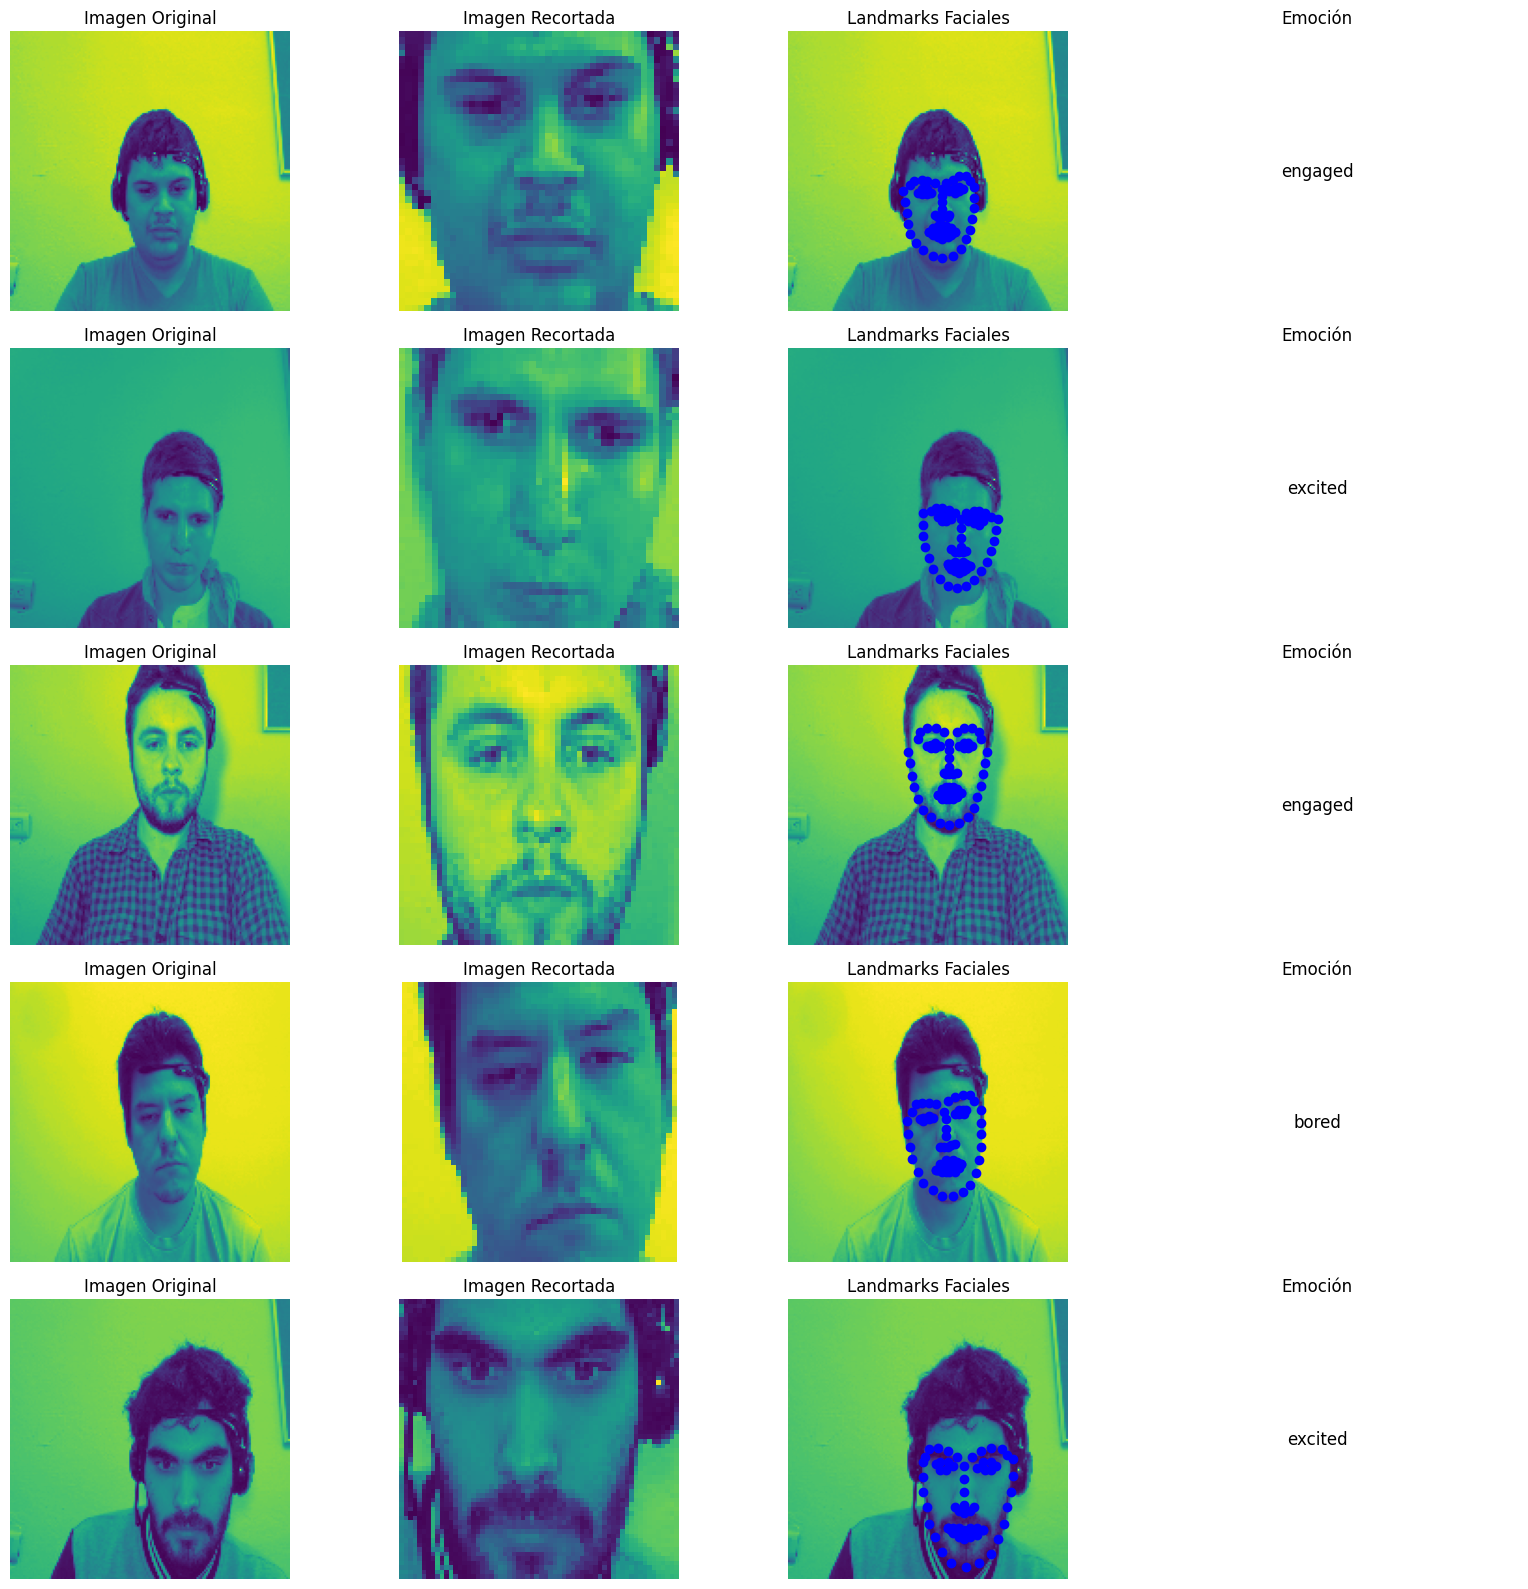

In [16]:
df_ejemploHDF = df_HDF.sample(n=5)

# Visualizar las imágenes seleccionadas con los rostros detectados y los landmarks faciales
fig, axes = plt.subplots(nrows=len(df_ejemploHDF), ncols=4, figsize=(16, 16))

for i, (index, row) in enumerate(df_ejemploHDF.iterrows()):
    # Subgráfico para la imagen original
    ax0 = axes[i, 0]
    ax0.imshow(row['Imagen'])
    ax0.set_title("Imagen Original")
    ax0.axis('off')
    
    # Subgráfico para la imagen recortada con el rostro detectado
    ax1 = axes[i, 1]
    imagen_recortada = row['Rostro']
    ax1.imshow(imagen_recortada)
    ax1.set_title("Imagen Recortada")
    ax1.axis('off')
    
    # Subgráfico para los landmarks faciales
    ax2 = axes[i, 2]
    ax2.imshow(row['Imagen'])

    for landmark in row['Caracteristicas']:
        for punto in landmark:
            ax2.plot(punto[0], punto[1], marker='o', markersize=6, color='blue')

    

    ax2.set_title("Landmarks Faciales")
    ax2.axis('off')
    
    # Subgráfico para la emoción (si está disponible)
    ax3 = axes[i, 3]
    # Aquí puedes agregar código para mostrar la emoción en lugar de un gráfico vacío
    ax3.text(0.5, 0.5, row['Etiqueta'], horizontalalignment='center', verticalalignment='center', fontsize=12)
    ax3.set_title("Emoción")
    ax3.axis('off')

plt.tight_layout()
plt.show()